<a href="https://colab.research.google.com/github/sr606/Machine_Learning_CaseStudies/blob/main/LoanApplication_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Files/Loan_Datset_Kaggle/train_u6lujuX_CVtuZ9i.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.shape

(614, 13)

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [26]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.select_dtypes(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


<Axes: xlabel='Loan_Status', ylabel='count'>

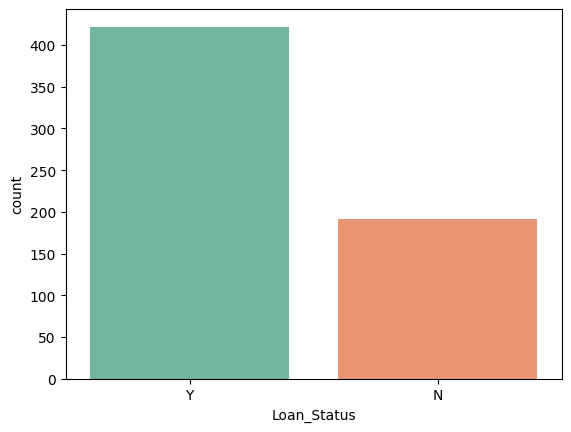

In [20]:
sns.countplot(x = 'Loan_Status', data = train, palette= 'Set2')

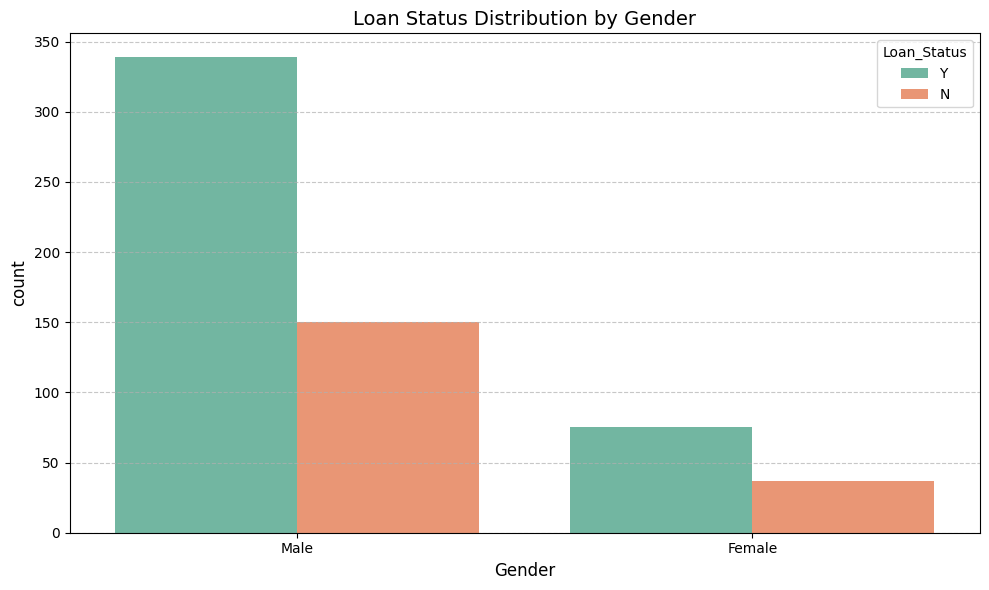

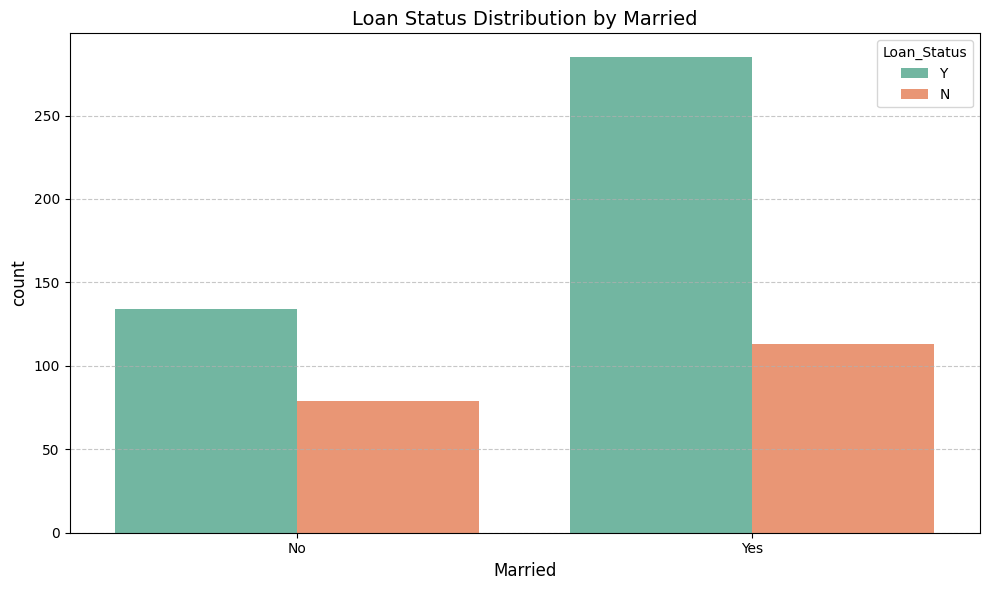

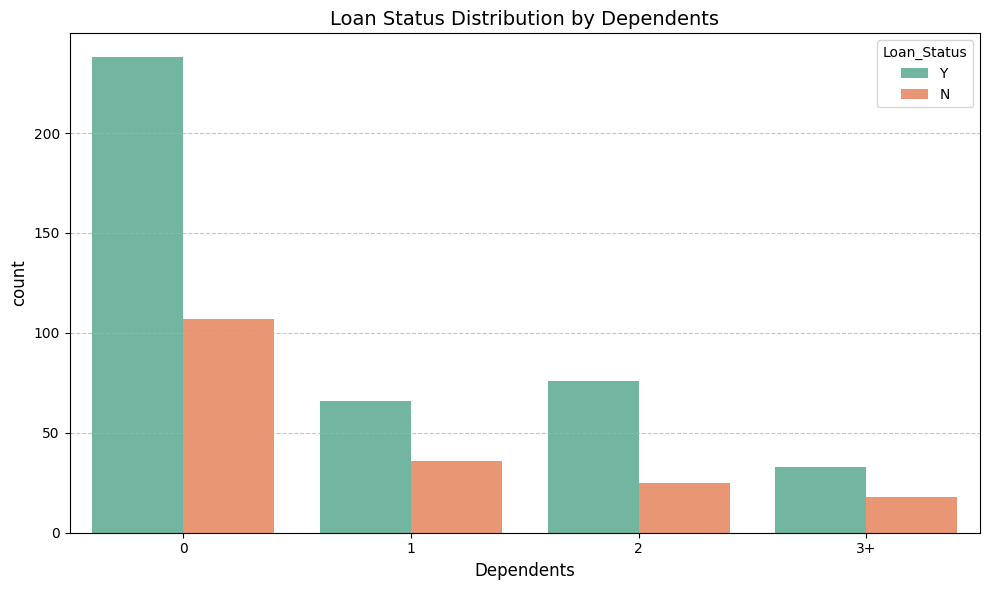

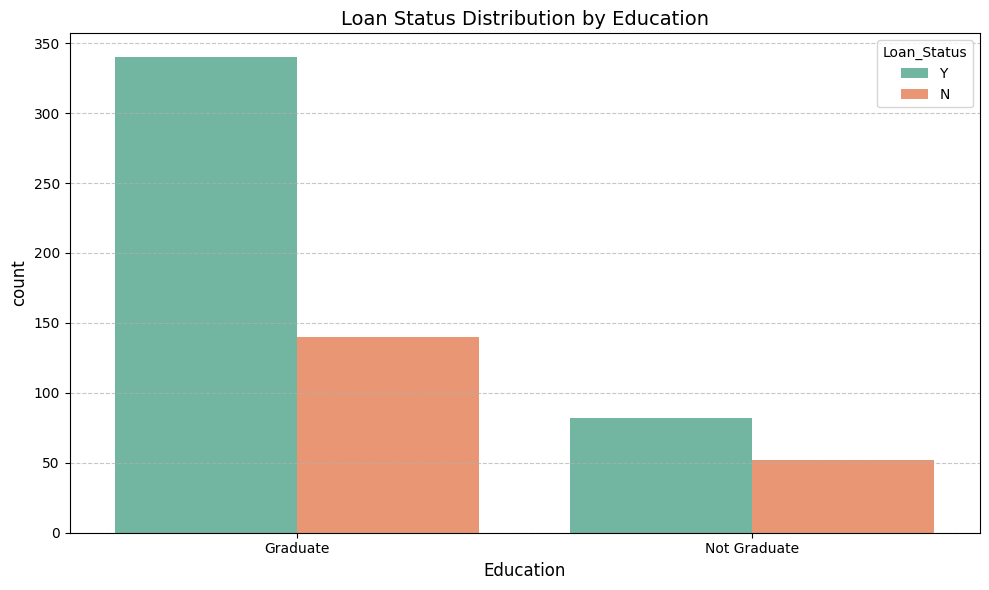

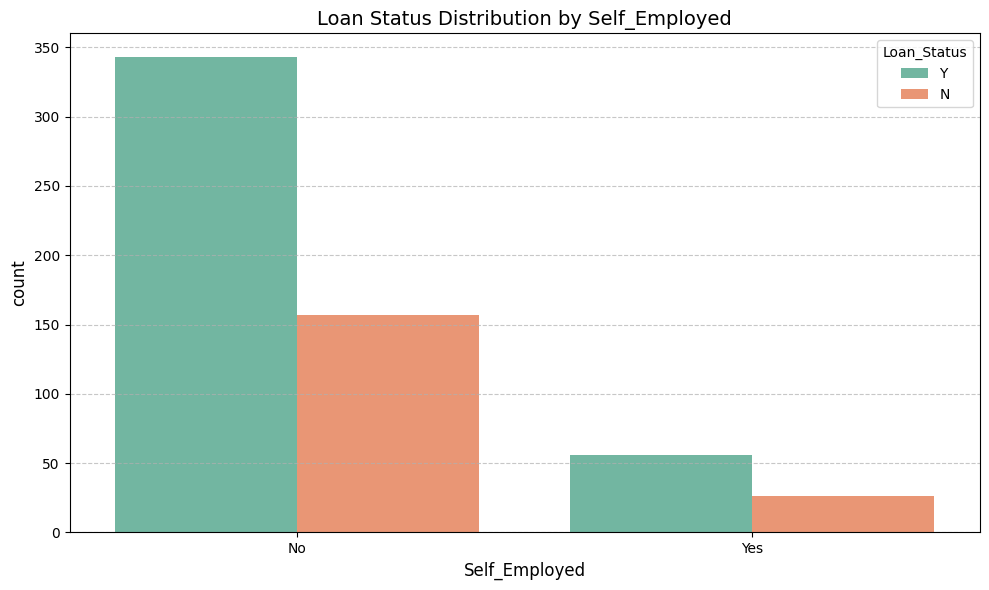

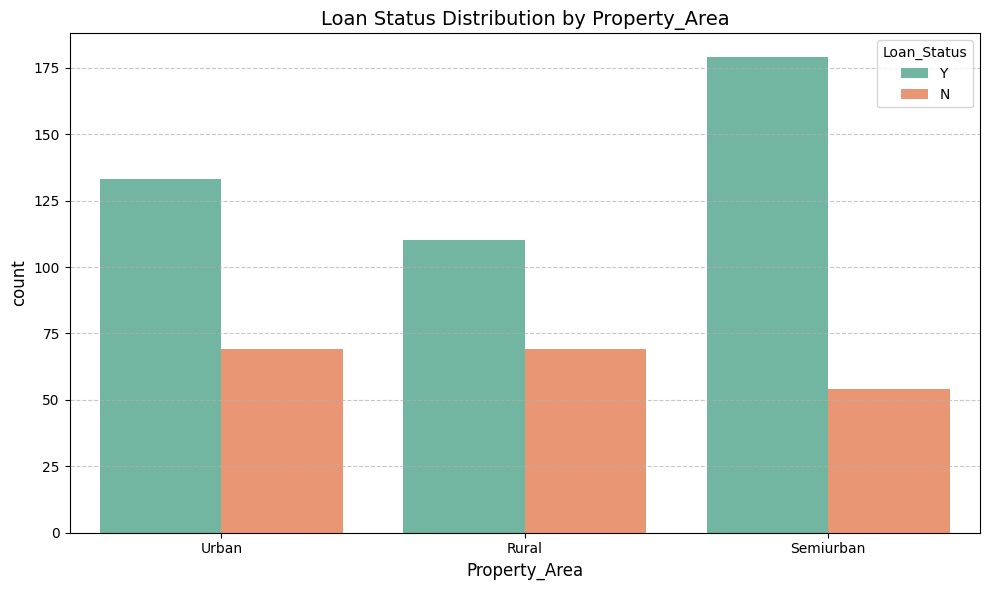

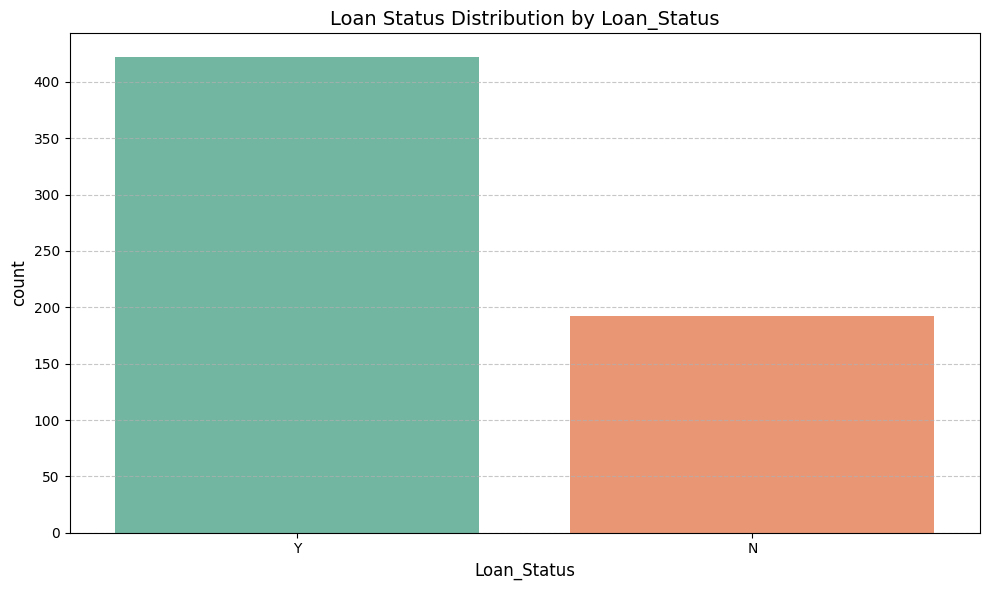

In [25]:
object_columns = train.select_dtypes(include='object').columns
# Exclude 'Loan_ID' from the columns to plot
object_columns = object_columns.drop('Loan_ID')
for  col in object_columns:
  plt.figure(figsize=(10,6))
  sns.countplot(x = col, hue = 'Loan_Status', data = train, palette= 'Set2')


  plt.title(f'Loan Status Distribution by {col}', fontsize=14)
  plt.xlabel(col, fontsize = 12)
  plt.ylabel('count', fontsize=12)
  #plt.xticks(rotation=45)
  plt.grid(axis = 'y', linestyle = '--', alpha=0.7)
  plt.tight_layout()
  plt.show()

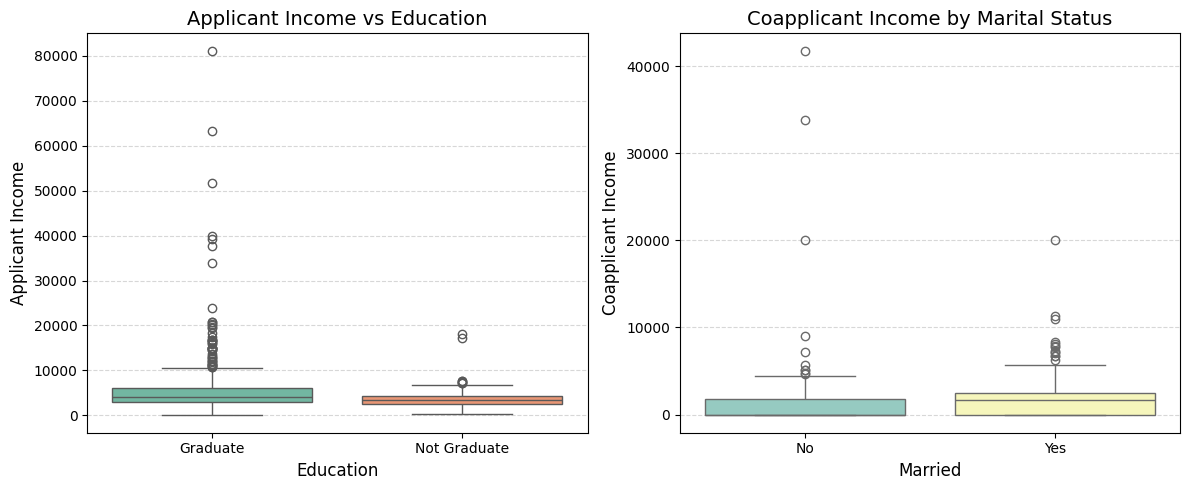

In [35]:
#How income varies with education or marital status

plt.figure(figsize=(12,5))


# Plot 1: Applicant Income vs Education
plt.subplot(1,2,1)
sns.boxplot(data=train, x='Education', y='ApplicantIncome', palette='Set2')
plt.title('Applicant Income vs Education', fontsize=14)
plt.xlabel('Education', fontsize = 12)
plt.ylabel('Applicant Income', fontsize=12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)



# Plot 2: Coapplicant Income vs Marital Staus
plt.subplot(1,2,2)
sns.boxplot(data=train, x = 'Married', y = 'CoapplicantIncome', palette = 'Set3')
plt.title('Coapplicant Income by Marital Status', fontsize = 14)
plt.xlabel('Married', fontsize = 12)
plt.ylabel('Coapplicant Income', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)


plt.tight_layout()
plt.show()

In [37]:
edu_loan_crosstab = pd.crosstab(train['Education'], train['Loan_Status'], normalize='index') * 100
edu_loan_crosstab = edu_loan_crosstab.round(2)  # Round to 2 decimal places
display(edu_loan_crosstab)


Loan_Status,N,Y
Education,,
Graduate,29.17,70.83
Not Graduate,38.81,61.19


In [39]:
train['Loan_Status'].value_counts(normalize=True) * 100

,proportion
Loan_Status,
Y,68.729642
N,31.270358


###Missing Values

In [40]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0] , inplace = True)


In [42]:
df = train.dropna(subset=['Married'])

In [45]:
df = df.drop('Loan_ID', axis = 1)

In [46]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [48]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
label_cols = df.select_dtypes(include='object').columns
# Create a dictionary to store each column's encoder (optional but useful)
encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Store the encoder for future inverse_transform if needed


In [49]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [50]:
from sklearn.model_selection import train_test_split


X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\n\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8292682926829268


Confusion Matrix:
 [[16 19]
 [ 2 86]]


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.46      0.60        35
           1       0.82      0.98      0.89        88

    accuracy                           0.83       123
   macro avg       0.85      0.72      0.75       123
weighted avg       0.84      0.83      0.81       123



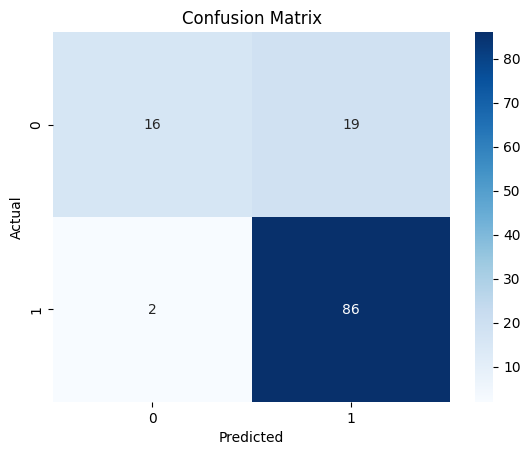

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [60]:
print(y_train.value_counts())


Loan_Status
1    331
0    157
Name: count, dtype: int64


In [56]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)


In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [62]:
model = LogisticRegression(max_iter=1000)
model.fit(X_res, y_res)


LogisticRegression(max_iter=1000)

In [63]:
y_pred = model.predict(X_test)


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7642276422764228


Confusion Matrix:
 [[19 16]
 [13 75]]


Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.54      0.57        35
           1       0.82      0.85      0.84        88

    accuracy                           0.76       123
   macro avg       0.71      0.70      0.70       123
weighted avg       0.76      0.76      0.76       123

